In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
% matplotlib inline
import seaborn as sb
from datetime import datetime

In [2]:
df = pd.read_csv('Verzeo/appstore_games (2).csv')

In [3]:
df.shape

(17007, 18)

In [4]:
list(df.columns)

['URL',
 'ID',
 'Name',
 'Subtitle',
 'Icon URL',
 'Average User Rating',
 'User Rating Count',
 'Price',
 'In-app Purchases',
 'Description',
 'Developer',
 'Age Rating',
 'Languages',
 'Size',
 'Primary Genre',
 'Genres',
 'Original Release Date',
 'Current Version Release Date']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             7561 non-null float64
User Rating Count               7561 non-null float64
Price                           16983 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date       

In [6]:
df.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


# Data Cleaning

Following Strategy is followed:
1. Unimportant columns are discarded
2. Rows having null values in Average User Rating column are discarded
3. Rows having User Rating Count<100 are discarded

In [7]:
df.drop(["URL","ID","Icon URL"], inplace = True, axis=1)

In [8]:
df.isnull().sum()

Name                                0
Subtitle                        11746
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

In [9]:
df.dropna(subset=['Average User Rating'], how='all', inplace=True)

In [10]:
myfilter = df["User Rating Count"]<100

In [11]:
df.drop(myfilter , inplace=True)

In [12]:
df.shape

(7559, 15)

In [13]:
df["Average User Rating"].value_counts()

4.5    2861
4.0    1721
5.0     990
3.5     924
3.0     514
2.5     317
2.0     158
1.5      60
1.0      14
Name: Average User Rating, dtype: int64

In [14]:
df["Average User Rating"].describe()

count    7559.000000
mean        4.060987
std         0.751499
min         1.000000
25%         3.500000
50%         4.500000
75%         4.500000
max         5.000000
Name: Average User Rating, dtype: float64

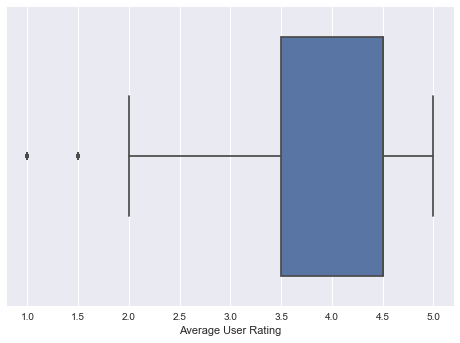

In [15]:
sb.boxplot(df["Average User Rating"])
plot.show()

Hence, there are no outliers or junk values

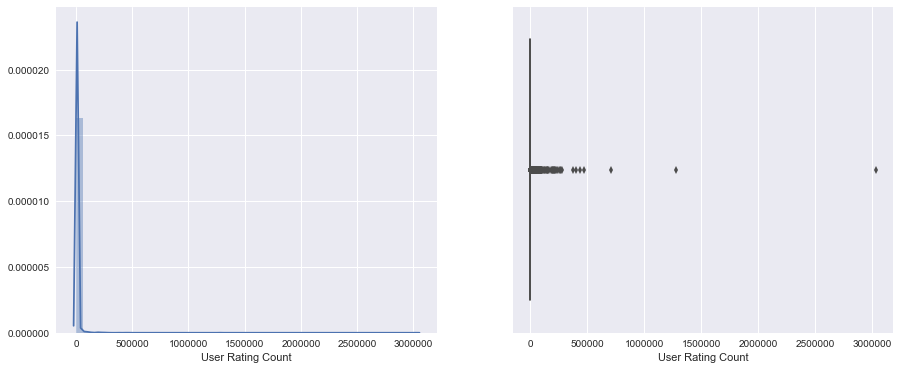

In [16]:
fig, ax = plot.subplots(1,2, figsize=(15,6))
sb.distplot(df["User Rating Count"].dropna(), ax=ax[0])
sb.boxplot(df["User Rating Count"].dropna(), ax=ax[1])
plot.show()

In [17]:
df["Price"].value_counts().sort_index()

0.00      6325
0.99       352
1.99       200
2.99       251
3.99       105
4.99       185
5.99        28
6.99        26
7.99        10
8.99        12
9.99        48
11.99        3
12.99        3
14.99        2
16.99        1
19.99        5
36.99        1
59.99        1
139.99       1
Name: Price, dtype: int64

In [18]:
df["Price"].describe()

count    7559.000000
mean        0.570798
std         2.415762
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       139.990000
Name: Price, dtype: float64

Therefore, prices can be grouped in some range brackets

In [19]:
df["In-app Purchases"] = df["In-app Purchases"].dropna().map(lambda x: list(float(i) for i in x.split(", ")))

In [20]:
df["Size"] = df["Size"].map(lambda x: round(x/(1024 * 1024), 2))
df["Size"].head()

2     0.64
3    20.55
4    33.08
5    46.42
6     6.04
Name: Size, dtype: float64

    Release Dates are present in strings. The need to be converted in date types

In [21]:
df["Original Release Date"] = df["Original Release Date"].map(lambda x: datetime.strptime(x, "%d/%m/%Y"))

In [22]:
df["Current Version Release Date"] = df["Current Version Release Date"].map(lambda x: datetime.strptime(x, "%d/%m/%Y"))

# After cleaning, data is analysed as follows

# 1. Genres


The Primary Genre with most no. of app downloads is found out to be Games. Hence, one should focus on 'genres' column to get a clearer insight

In [23]:
top_genres = list(df["Primary Genre"].value_counts().head(10).index)

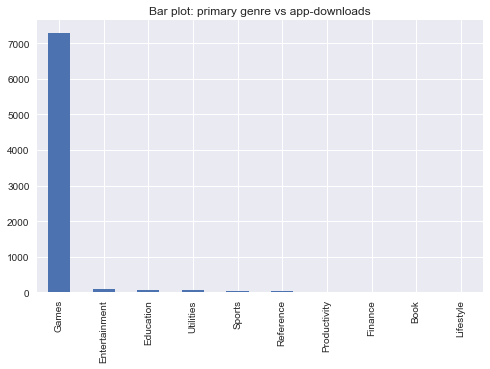

In [24]:
df[df["Primary Genre"].isin(top_genres)]["Primary Genre"].value_counts().plot.bar(figsize=(8,5))
plot.title("Bar plot: primary genre vs app-downloads")
plot.show()


A word cloud is an intersesting way to visualise the most frequent words in a document/list. Here, it is uesd to find out the most used genres from many listed in genres column

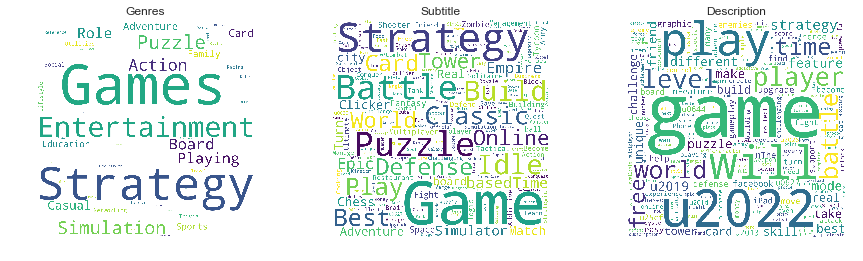

In [25]:
from wordcloud import WordCloud
df3 = df.copy()
df3["Genres"] = df3["Genres"].map(lambda x: x.split(", "))
df3["Genres"].head()
def my_word_cloud(list_variable):
    fig, ax = plot.subplots(1,3, figsize=(15,4))
    for i, variable in enumerate(list_variable):
        corpus = df3[variable].dropna()
        if variable not in ("Genres"):
            corpus = corpus.map(lambda x: x.replace(",", "").split(" "))
            corpus = corpus.map(lambda x: [word for word in x if len(word) > 3])
        corpus = ",".join(word for word_list in corpus for word in word_list)
        wordcloud = WordCloud(max_font_size=None, background_color="white", collocations=False, width=1500, height=1500).generate(corpus)
        ax[i].imshow(wordcloud)
        ax[i].set_title(variable)
        ax[i].axis("off")
    plot.show()

my_word_cloud(["Genres", "Subtitle" ,"Description"])

Here it is clearly seen that most popular genres are:
Games,
Entertainment,
Strategy,
Simulation,
Action,
Puzzle, etc.

Therefore, combinations of genres can be grouped together to get main categories, which is done as follows: 

In [26]:
df2 = df.copy()
df2['Genres'] = df2['Genres'].str.replace(',', '').str.replace('Games', '').str.replace('Entertainment', '').str.replace('Strategy', '') 
df2['Genres'] = df2['Genres'].str.split(' ').map(lambda x: ' '.join(sorted(x)))
df2['Genres']= df2['Genres'].str.strip()
df2['Genres'].value_counts()
Non_Main_Genre=df2[~df2.Genres.str.contains('Puzzle') & \
                           ~df2.Genres.str.contains('Action') & \
                           ~df2.Genres.str.contains('Family')& \
                           ~df2.Genres.str.contains('Education')& \
                           ~df2.Genres.str.contains('Family')& \
                           ~df2.Genres.str.contains('Adventure')&\
                           ~df2.Genres.str.contains('Board')&\
                           ~df2.Genres.str.contains('Simulation') & \
                           ~df2.Genres.str.contains('Role')].index
df2.drop(Non_Main_Genre , inplace=True)
df2.loc[df2['Genres'].str.contains('Puzzle'),'Genres'] = 'Puzzle/Board'
df2.loc[df2['Genres'].str.contains('Board'),'Genres'] = 'Puzzle/Board'
df2.loc[df2['Genres'].str.contains('Action'),'Genres'] = 'Action'
df2.loc[df2['Genres'].str.contains('Adventure'),'Genres'] = 'Adventure'
df2.loc[df2['Genres'].str.contains('Role'),'Genres'] = 'Role-Playing/Simulation'
df2.loc[df2['Genres'].str.contains('Simulation'),'Genres'] = 'Role-Playing/Simulation'
df2.loc[df2['Genres'].str.contains('Family'),'Genres'] = 'Family'
df2.loc[df2['Genres'].str.contains('Education'),'Genres'] = 'Family'

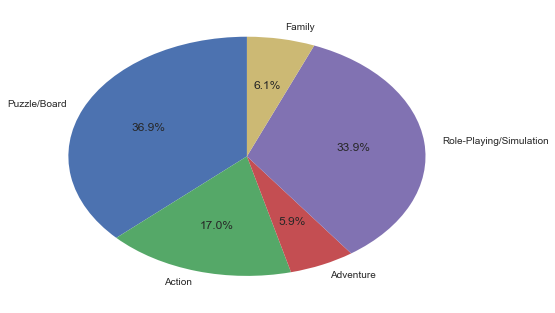

In [27]:
NG = [df2.Genres[(df2['Genres']=='Puzzle/Board')].count(),df2.Genres[(df2['Genres']=='Action')].count(),
      df2.Genres[(df2['Genres']=='Adventure')].count(),df2.Genres[(df2['Genres']=='Role-Playing/Simulation')].count(),
     df2.Genres[(df2['Genres']=='Family')].count()]
G = ['Puzzle/Board','Action','Adventure','Role-Playing/Simulation','Family']

plot.pie(NG, labels=G, startangle=90, autopct='%.1f%%')
plot.show()


Hence, most popular categories of strategy games are Puzzle/Board games, followed closely by Role-Playing/Simulation and then by Action 

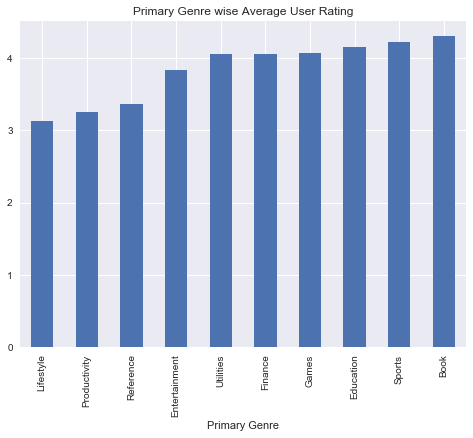

In [28]:
df[df["Primary Genre"].isin(top_genres)].groupby("Primary Genre")["Average User Rating"].agg("mean").sort_values().plot.bar(figsize=(8,6))
plot.title("Primary Genre wise Average User Rating")
plot.show()

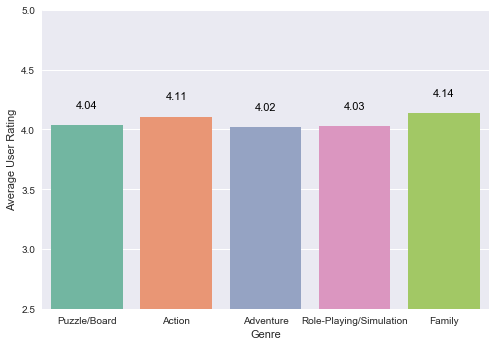

In [29]:
x=['Puzzle/Board','Action','Adventure','Role-Playing/Simulation','Family']
y = [df2['Average User Rating'][(df2['Genres']=='Puzzle/Board')].mean(),\
     df2['Average User Rating'][(df2['Genres']=='Action')].mean(),\
     df2['Average User Rating'][(df2['Genres']=='Adventure')].mean(),\
     df2['Average User Rating'][(df2['Genres']=='Role-Playing/Simulation')].mean(),\
     df2['Average User Rating'][(df2['Genres']=='Family')].mean()]

graph1= sb.barplot(x,y,palette='Set2')
graph1.set(xlabel='Genre',ylabel='Average User Rating')
graph1.set(ylim=(2.5,5))


for p in graph1.patches:
             graph1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')

plot.show()

        Hence, genre-wise ratings can be observed, where Family games are the highest rated ones. 
An important point to be noted is that the mean average user ratings of every genre are not much less than the highest value. 

# 2. Prices

    Price brackets are created as follows :- Free $0.00
    Low Price $0.99 - $4.99
    Medium Price $5.99 - $19.99
    High Price > $19.99

In [30]:
df3["Price Range"] = df3["Price"].dropna().map(lambda x: "Free" if x == 0.00 else("Low Price" if 0.99 <= x <= 4.99 else("Medium Price" if 5.99 <= x <= 19.99 else "High Price")))
df3["Price Range"].value_counts()

Free            6325
Low Price       1093
Medium Price     138
High Price         3
Name: Price Range, dtype: int64

In [31]:
df3["Total In-app Purchases"] = df3["In-app Purchases"].dropna().map(lambda x: sum(x))
df3["Total In-app Purchases"].dropna().value_counts().head()

0.99    391
1.99    251
2.99    206
1.98     76
4.99     68
Name: Total In-app Purchases, dtype: int64

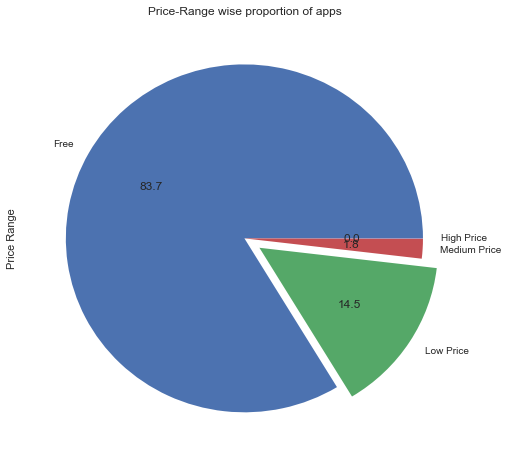

In [32]:
df3["Price Range"].dropna().value_counts().plot.pie(autopct="%1.1f", explode=[0,0.1,0,0], figsize=(8,8))
plot.title("Price-Range wise proportion of apps")
plot.show()

Hence, 
    Most of the apps available are for free (83.7%).
    There are few apps which are medium (1.6%) and high (0.2%) priced.
    As the price of the apps increases, we see number of apps descreases drastically.


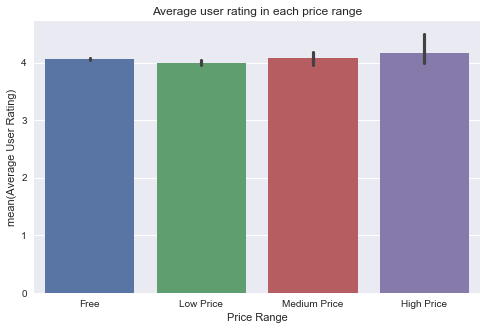

In [33]:
plot.figure(figsize=(8,5))
sb.barplot(data=df3, x="Price Range", y="Average User Rating")
plot.title("Average user rating in each price range")
plot.show()

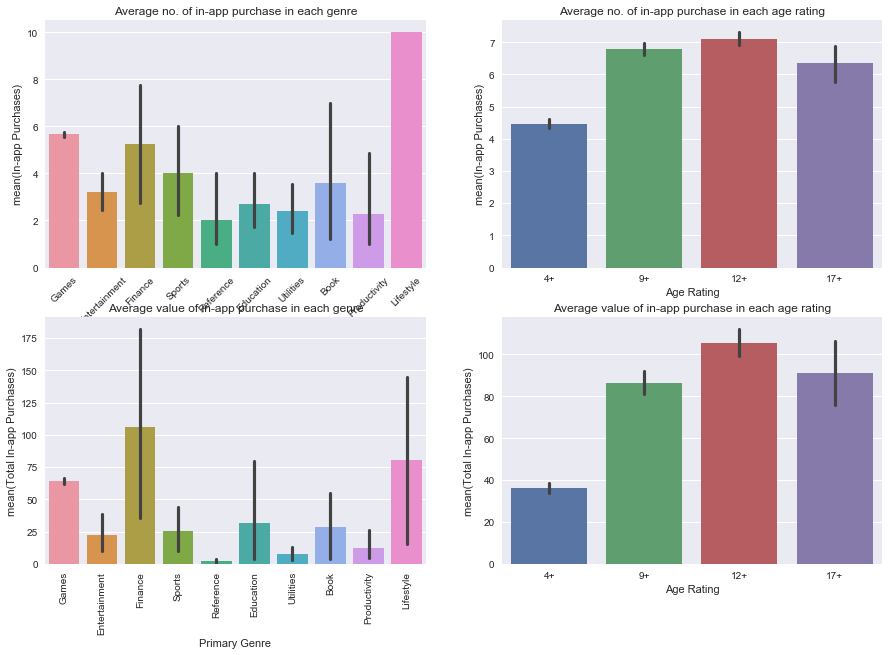

In [34]:
fig, ax = plot.subplots(2,2, figsize=(15,10))
sb.barplot(data=df3[df3["Primary Genre"].isin(top_genres)], x="Primary Genre", y=df["In-app Purchases"].dropna().map(lambda x: len(x)), ax=ax[0,0]).set_xticklabels(ax[0,0].get_xticklabels(), rotation=45)
sb.barplot(data=df3, x="Age Rating", y=df["In-app Purchases"].dropna().map(lambda x: len(x)), ax=ax[0,1])
sb.barplot(data=df3[df3["Primary Genre"].isin(top_genres)], x="Primary Genre", y="Total In-app Purchases", ax=ax[1,0]).set_xticklabels(ax[1,0].get_xticklabels(), rotation=90)
sb.barplot(data=df3, x="Age Rating", y="Total In-app Purchases", ax=ax[1,1])
ax[0,0].set_title("Average no. of in-app purchase in each genre")
ax[0,1].set_title("Average no. of in-app purchase in each age rating")
ax[1,0].set_title("Average value of in-app purchase in each genre")
ax[1,1].set_title("Average value of in-app purchase in each age rating")
plot.show()

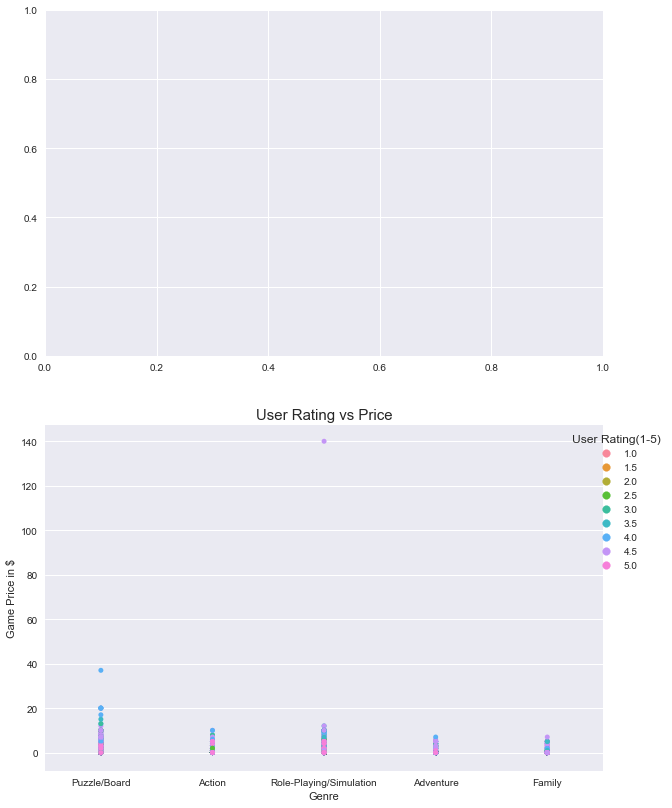

In [49]:
h, axes = plot.subplots (2,1, figsize=(10,14))
vis2 = sb.stripplot(y=df2.Price, x=df2.Genres, data=df2,ax=axes[1],hue=df2['Average User Rating'])
vis2.set(xlabel='Genre',ylabel='Game Price in $')
axes[1].set_title('User Rating vs Price',fontsize=15)
plot.legend(title='User Rating(1-5)',bbox_to_anchor=(1.12, 1))

plot.show()



<font color = 'blue'>Here, High rated games across genres are seen as priced around 10$

# 3. Size

In [52]:
review = df.sort_values(by='Size', ascending=False)[['Name','Genres','Size','Average User Rating']].head(20)
review.iloc[:, 0:-1]

,Name,Genres,Size
11957,ROME: Total War - Alexander,"Games, Simulation, Strategy",3820.03
8398,ROME: Total War,"Games, Simulation, Strategy",3735.25
2147,"""Baldur's Gate II: EE""","Games, Role Playing, Strategy",3574.13
11724,"""Sid Meier's Civilization\xae VI""","Games, Entertainment, Strategy, Simulation",3544.71
10468,ROME: Total War - BI,"Games, Simulation, Strategy",3432.69
3905,XCOM\xae: Enemy Within,"Games, Strategy, Action",3355.29
15812,Shieldwall Chronicles,"Games, Strategy, Role Playing",3169.83
8416,Banner Saga 2,"Games, Entertainment, Role Playing, Strategy",3167.23
7255,Mission 1545,"Games, Strategy, Education, Adventure",3034.36
4425,Icewind Dale,"Games, Strategy, Role Playing",2857.23


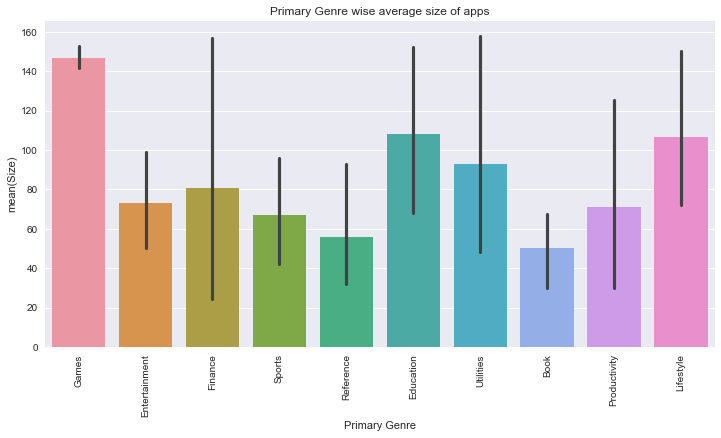

In [44]:
plot.figure(figsize=(12,6))
sb.barplot(data=df[df["Primary Genre"].isin(top_genres)], x="Primary Genre", y="Size")
plot.xticks(rotation=90)
plot.title("Primary Genre wise average size of apps")
plot.show()

Here, Games genre is having average highest average size of apps, around 110 MB.
Also, genres such as Role Playing Simulation and Strategy have higher MBs of apps.

# Inference


<font color = blue>Best Combination of Strategy games in order to get a good user rating(>4.0) in App Store can be - <br><br> 1. <font color = red>Primary Genre <font color = blue>= Games ; <font color = red>Other genres = Puzzle/Board/Role-Playing/Simulation (Although Family genre has the highest mean rating, but that is attributed to low competition) ;<font color = blue> Subtitles include words like <font color = red>Strategy, Game, Battle, Puzzle 
<br>2. <font color = red>Price range <font color = blue>: not more than <font color = red>10$ ; <font color = blue>most games are free or low-priced ; combined with in-app purchases it is seen that less purchases are there for pricey games
<br> 3.<font color = red>Size : <font color = blue>simulation and role-playing games are sized > 100MB ; in general less sixe games are preferred in Puzzle/Board 
<br> 4.<font color = red>Age: <font color = blue>Games should necessarily have an <font color = red>age-rating >4 years <font color = blue>to achieve a good rating
